In [7]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# Вычисления проводятся с помощью numpy, графики строятся с помощью matplotlib.pyplot

#### 1. Найти SVD разложение и с его помощью псевдообратную матрицу для 
$A=
\begin{pmatrix} 
-36 & -2 & -31 & -94 \\ 
-12 & -70 & 10 & -11 \\ 
48 & 53 & -26 & 58 
\end{pmatrix}$


Нужно представить матрицу $A$ в виде $A_{m, n} = V_{m, m} \Sigma_{m, n} U^*_{n, n}$, где матрицы $V$ и $U$ унитарные, а матрица $\Sigma$ диагональная.

Сначала найдем собственные числа матрицы $B = A^* A = 
\begin{pmatrix} 
3744 & 3456 & -252 & 6300 \\ 
3456 & 7713 & -2016 & 4032 \\
-252 & -2016 & 1737 & 1296 \\
6300 & 4032 & 1296 & 12321 
\end{pmatrix}$. Для этого решим характеристическое уравнение: $ det(B - \lambda E) = 0 $: $ \lambda_1=18225, \lambda_2=6561, \lambda_3=729, \lambda_4=0 $.

Матрица $\Sigma$: 
$$\Sigma =
\begin{pmatrix} 
\sigma_1 & 0 & 0\\ 
0 & \sigma_2 & 0\\
0 & 0 & \sigma_3\\
0 & 0 & 0
\end{pmatrix} = 
\begin{pmatrix} 
\sqrt \lambda_1 & 0 & 0\\ 
0 & \sqrt \lambda_2 & 0\\
0 & 0 & \sqrt \lambda_3\\
0 & 0 & 0
\end{pmatrix} = 
\begin{pmatrix} 
135 & 0 & 0\\ 
0 & 81 & 0\\
0 & 0 & 27\\
0 & 0 & 0
\end{pmatrix}$$

Теперь найдем собственные векторы по этим собственным числам. Для этого приведем матрицы $B - \lambda_i E$
к каноническому виду (пользуюсь сайтом https://matrixcalc.org/slu.html):
$$B - \lambda_1 E =
\begin{pmatrix} 
3744-18225 & 3456 & -252 & 6300\\ 
3456 & 7713-18225 & -2016 & 4032\\
-252 & -2016 & 1737-18225 & 1296\\
6300 & 4032 & 1296 & 12321-18225
\end{pmatrix} \sim
\begin{pmatrix} 
1 & 0 & 0 & -4/7\\ 
0 & 1 & 0 & -4/7\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 0
\end{pmatrix} \implies e_1 = 
\begin{pmatrix} 
4/9 \\ 
4/9 \\
0 \\
7/9
\end{pmatrix}, \\ B - \lambda_2 E =
\begin{pmatrix} 
3744-6561 & 3456 & -252 & 6300\\ 
3456 & 7713-6561 & -2016 & 4032\\
-252 & -2016 & 1737-6561 & 1296\\
6300 & 4032 & 1296 & 12321-6561
\end{pmatrix} \sim
\begin{pmatrix} 
1 & 0 & 0 & 0\\ 
0 & 1 & 0 & 7/4\\
0 & 0 & 1 & -1\\
0 & 0 & 0 & 0
\end{pmatrix} \implies e_2 = 
\begin{pmatrix} 
0 \\ 
-7/9 \\
4/9 \\
4/9
\end{pmatrix}, \\ B - \lambda_3 E =
\begin{pmatrix} 
3744-729 & 3456 & -252 & 6300\\ 
3456 & 7713-729 & -2016 & 4032\\
-252 & -2016 & 1737-729 & 1296\\
6300 & 4032 & 1296 & 12321-729
\end{pmatrix} \sim
\begin{pmatrix} 
1 & 0 & 4/7 & 0\\ 
0 & 1 & -4/7 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 0 & 0
\end{pmatrix} \implies e_3 = 
\begin{pmatrix} 
-4/9 \\ 
4/9 \\
7/9 \\
0
\end{pmatrix}, \\ B - \lambda_4 E =
\begin{pmatrix} 
3744-0 & 3456 & -252 & 6300\\ 
3456 & 7713-0 & -2016 & 4032\\
-252 & -2016 & 1737-0 & 1296\\
6300 & 4032 & 1296 & 12321-0
\end{pmatrix} \sim
\begin{pmatrix} 
1 & 0 & 0 & 7/4\\ 
0 & 1 & 0 & 0\\
0 & 0 & 1 & 1\\
0 & 0 & 0 & 0
\end{pmatrix} \implies e_4 = 
\begin{pmatrix} 
-7/9 \\ 
0 \\
-4/9 \\
4/9
\end{pmatrix}$$


Матрица U будет иметь вид: 
$$ 
U = 
\begin{pmatrix} 
e_1 & e_2 & e_3 & e_4
\end{pmatrix} = 
\begin{pmatrix} 
4/9 & 0 & -4/9 & -7/9 \\ 
4/9 & -7/9 & 4/9 & 0 \\
0 & 4/9 & 7/9 & -4/9 \\
7/9 & 4/9 & 0 & 4/9
\end{pmatrix} 
$$

Найдем векторы 
$q_k = \sigma_k^{-1} A e_k (k=1,2,3) \implies q_1 = 
\begin{pmatrix} 
-2/3 \\ 
-1/3 \\
2/3
\end{pmatrix}, q_2 = 
\begin{pmatrix} 
-2/3 \\ 
2/3 \\
-1/3
\end{pmatrix}, q_3 = 
\begin{pmatrix} 
-1/3 \\ 
-2/3 \\
-2/3
\end{pmatrix}$

Матрица V будет иметь вид: 
$$V = 
\begin{pmatrix} 
q_1 & q_2 & q_3
\end{pmatrix} =
\begin{pmatrix} 
-2/3 & -2/3 & -1/3 \\ 
-1/3 & 2/3 & -2/3 \\
2/3 & -1/3 & -2/3
\end{pmatrix}$$

Псевдообратная матрица находится по формуле:
$$A^+ = U \Sigma^{-1} V^* = 
\begin{pmatrix} 
4/9 & 4/9 & 0 & 7/9 \\ 
0 & -7/9 & 4/9 & 4/9 \\
-4/9 & 4/9 & 7/9 & 0 \\
-7/9 & 0 & -4/9 & 4/9
\end{pmatrix} 
\begin{pmatrix} 
1/135 & 0 & 0 & 0 \\ 
0 & 1/81 & 0 & 0 \\
0 & 0 & 1/27 & 0 \\
0 & 0 & 0 & 0 
\end{pmatrix} 
\begin{pmatrix} 
-2/3 & -1/3 & 2/3 \\ 
-2/3 & 2/3 & -1/3 \\
-1/3 & -2/3 & -2/3
\end{pmatrix} = \\ = \cfrac{1}{10935} 
\begin{pmatrix}
36 & 108 & 144 \\
-14 & -202 & -61 \\
-145 & -170 & -230 \\
-82 & 19 & 22
\end{pmatrix} =
\begin{pmatrix}
0.00329218 & 0.00987654 & 0.01316872\\
-0.00128029 & -0.01847279 & -0.00557842\\
-0.01326017 & -0.01554641 & -0.02103338\\
-0.00749886 & 0.00173754 & 0.00201189
\end{pmatrix}$$

#### 2. Найти разложение полного ранга и псевдообразную для 
$A =
\begin{pmatrix} 
4 & 5 & 13\\ 
-1 & 0 & -7\\ 
3 & 4 & 9\\
-2 & -1 & -11
\end{pmatrix}$

Матрица $A_{m,n}$ представляется в виде произведения $F_{m,r} G_{r,n}$, где $r$ - ранг матрицы $A$.

Приведем матрицу $A$ к каноническому виду $A'$, тогда матрица $G$ будет составлена из ненулевых строк $A'$, 
а $F$ из столбцов $A$, соответствующих столбцам с единицами в $A'$:

$A =
\begin{pmatrix} 
4 & 5 & 13\\ 
-1 & 0 & -7\\ 
3 & 4 & 9\\
-2 & -1 & -11
\end{pmatrix} \sim 
\begin{pmatrix} 
1 & 0 & 7\\ 
0 & 1 & -3\\ 
0 & 0 & 0\\
0 & 0 & 0
\end{pmatrix} \implies G =
\begin{pmatrix} 
1 & 0 & 7\\ 
0 & -1 & -3\\ 
\end{pmatrix}, F =
\begin{pmatrix} 
4 & 5 \\ 
-1 & 0 \\ 
3 & 4 \\
-2 & -1
\end{pmatrix}$


$F G = 
\begin{pmatrix} 
4 & 5 & 13\\ 
-1 & 0 & -7\\ 
3 & 4 & 9\\
-2 & -1 & -11
\end{pmatrix} = A$

$A^+ = G^+ F^+ = G^* (G G^*)^{-1} (F^* F)^{-1} F^*$

$ G^* =
\begin{pmatrix} 
1 & 0\\ 
0 & -1\\ 
7 & -3
\end{pmatrix}, F^* =
\begin{pmatrix} 
4 & -1 & 3 & -2 \\ 
5 & 0 & 4 & -1
\end{pmatrix}, G G^* = 
\begin{pmatrix} 
50 & -21\\ 
-21 & 10\\
\end{pmatrix}, F^* F = 
\begin{pmatrix} 
30 & 34\\
34 & 42\\
\end{pmatrix}, (G G^*)^{-1} =
\cfrac{1}{59}
\begin{pmatrix} 
10 & 21\\ 
21 & 50\\
\end{pmatrix}, (F^* F)^{-1} =
\cfrac{1}{104}
\begin{pmatrix} 
42 & -34\\
-34 & 30\\
\end{pmatrix}$

$A^+ =
\begin{pmatrix} 
1 & 0\\ 
0 & -1\\ 
7 & -3
\end{pmatrix}
\cfrac{1}{59}
\begin{pmatrix} 
10 & 21\\ 
21 & 50\\
\end{pmatrix}
\cfrac{1}{104}
\begin{pmatrix} 
42 & -34\\
-34 & 30\\
\end{pmatrix}
\begin{pmatrix} 
4 & -1 & 3 & -2 \\ 
5 & 0 & 4 & -1
\end{pmatrix} = \\ =
\cfrac{1}{59*104}
\begin{pmatrix} 
274 & 294 & 278 & 298\\ 
658 & 818 & 690 & 850\\ 
-56 & -396 & -124 & -464
\end{pmatrix} =
\begin{pmatrix}
0.0446545 & 0.04791395 & 0.04530639 & 0.04856584\\
0.10723598 & 0.1333116 & 0.11245111 & 0.13852673\\
-0.00912647 & -0.06453716 & -0.0202086 & -0.0756193
\end{pmatrix}$

#### 3. Найти общую формулу решений системы уравнений по методу наименьших квадратов и среди них найти решение наименьшей длины.
$\begin{cases}
3x - 7y + 10z -15t = 1\\
-2x + 8y + 14z + 0t = 9\\
4x - 10y + 11z - 9t =5\\
-1x + 5y + 13z -4t = 5
\end{cases}$

$A = 
\begin{pmatrix} 
3 & -7 & 10 & -15\\ 
-2 & 8 & 14 & 0\\ 
4 & -10 & 11 & -9\\
-1 & 5 & 13 & -4
\end{pmatrix},
b = 
\begin{pmatrix} 
1\\ 
9\\ 
5\\
5
\end{pmatrix}$

Общее решение будет иметь вид: $x = A^+ b - (A^+ A - E) y, \ y \in \mathbb{C}^n$, а решение наименьшей длины будет: $u = A^+ b$.
Аналогично предыдущему заданию находим $A^+$ с помощью разложения полного ранга:
$A = 
\begin{pmatrix} 
3 & -7 & 10 & -15\\ 
-2 & 8 & 14 & 0\\ 
4 & -10 & 11 & -9\\
-1 & 5 & 13 & -4
\end{pmatrix} \sim
\begin{pmatrix} 
1 & 0 & 0 & -101\\ 
0 & 1 & 0 & -34\\ 
0 & 0 & 1 & 5\\
0 & 0 & 0 & 0
\end{pmatrix}, G =
\begin{pmatrix} 
1 & 0 & 0 & -101\\ 
0 & 1 & 0 & -34\\ 
0 & 0 & 1 & 5
\end{pmatrix}, F = 
\begin{pmatrix} 
3 & -7 & 10\\ 
-2 & 8 & 14\\ 
4 & -10 & 11\\
-1 & 5 & 13
\end{pmatrix}, A^+ = 
\cfrac{1}{560*11383}
\begin{pmatrix}
-113536 & -10864 & 227312 & -71552\\
319950 & 64190 & -631930 & 226790\\
-267346 & 257726 & 416342 & 65078\\
-747894 & 203434 & 608818 & -158718
\end{pmatrix}$

$u = A^+ b =
\cfrac{1}{560*11383}
\begin{pmatrix} 
567488\\
-1128040\\
4459288\\
3333512
\end{pmatrix} \approx
\begin{pmatrix} 
0.08902499\\
-0.17696189\\
0.69955322\\
0.5229465
\end{pmatrix}$

$x = A^+ b - (A^+ A - E) y, y \in \mathbb{C}^n \approx
\begin{pmatrix} 
0.08902499\\
-0.17696189\\
0.69955322\\
0.5229465
\end{pmatrix} -
\begin{pmatrix}
-0.89616094 & -0.30167794 & 0.0443644 & -0.00887288\\
-0.30167794 & -0.10155495 & 0.01493455 & -0.00298691\\
0.0443644 & 0.01493455 & -0.00219626 & 0.00043925\\
-0.00887288 & -0.00298691 & 0.00043925 & -0.00008785
\end{pmatrix} y, \ y \in \mathbb{C}^n$

#### 4. Построить график и выписать интерполяционный многочлен Лагранжа для функции, проходящей через четыре точки: (-3, -20), (-1, -19), (1, 19), (2, -10)
| x |-3 |-1 | 1 | 2 |
|---|---|---|---|---|
| y |-20|-19| 19|-10|


По формуле: $f(x) = \sum_{j=0}^n y_j \cfrac{V(x_0, ..., \overset{j}{x}, ... , x_n)}{V} = \sum_{j=0}^n y_j \cfrac{(x-x_0)...(x-x_{j-1})(x-x_{j+1})...(x-x_n)}{(x_j-x_0)...(x_j-x_{j-1})(x_j-x_{j+1})...(x_j-x_n)}$

$f(x) = -20\cdot \cfrac{(x+1)(x-1)(x-2)}{-2\cdot -4\cdot -5} - 19\cdot \cfrac{(x+3)(x-1)(x-2)}{2\cdot -2\cdot -3} + 19\cdot \cfrac{(x+3)(x+1)(x-2)}{4\cdot 2\cdot -1} - 10\cdot \cfrac{(x+3)(x+1)(x-1)}{5\cdot 3\cdot 1} = \cfrac{1}{2} (x^3-2x^2-x+2) - \cfrac{19}{12} (x^3-7x+6) - \cfrac{19}{8} (x^3+2x^2-5x-6) - \cfrac{2}{3} (x^3+3x^2-x-3) = \cfrac{-99x^3-186x^2+555x+186}{24}$

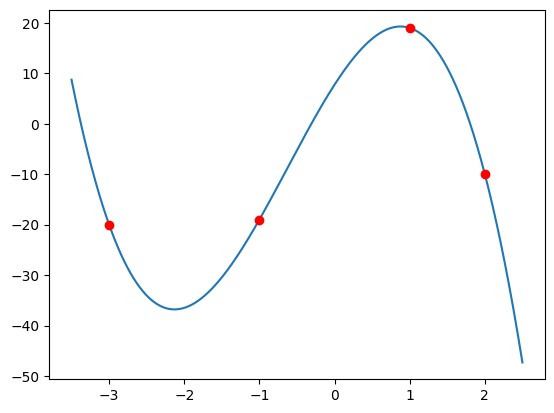

In [5]:
x = np.linspace(-3.5, 2.5, 1000)
y = (-99 * x**3 - 186 * x**2 + 555 * x + 186) / 24

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot([-3, -1, 1, 2], [-20, -19, 19, -10], 'ro')

plt.show()

#### 5. Построить график и найти (параметрически) уравнение кривой Безье, заданной четырьмя точками: (1, 1), (5, 4), (6, 0), (9, 9)


По формуле: $B(t) = \sum_{i=0}^k A_i B_{k, i}(t), \ B_{n, k} = C_n^k (1-t)^{n-k} t^k$

$B(t) = \begin{pmatrix}1\\1\end{pmatrix} (1-t)^3 + \begin{pmatrix}5\\4\end{pmatrix} 3(1-t)^2 t + \begin{pmatrix}6\\0\end{pmatrix} 3(1-t) t^2 + \begin{pmatrix}9\\9\end{pmatrix} t^3 = \begin{pmatrix}1\\1\end{pmatrix} (1-3t+3t^2-t^3) + \begin{pmatrix}5\\4\end{pmatrix} 3(t-2t^2+t^3) + \begin{pmatrix}6\\0\end{pmatrix} 3(t^2-t^3) + \begin{pmatrix}9\\9\end{pmatrix} t^3 = \begin{pmatrix}1\\1\end{pmatrix} + \begin{pmatrix}12\\9\end{pmatrix} t + \begin{pmatrix}-9\\-21\end{pmatrix} t^2 + \begin{pmatrix}5\\20\end{pmatrix} t^{3}, \ t \in [0,1]$

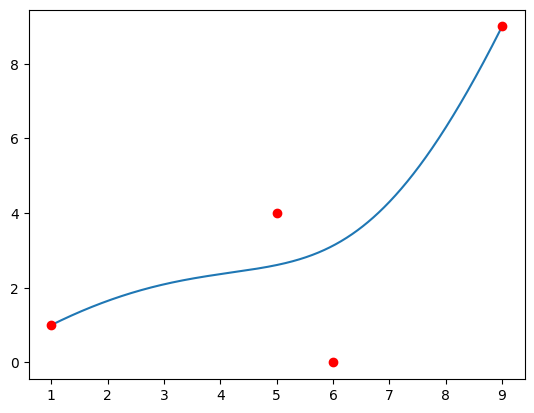

In [6]:
t = np.linspace(0, 1, 1000)
x = 1 + 12 * t - 9 * t**2 + 5 * t**3
y = 1 + 9 * t - 21 * t**2 + 20 * t**3

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot([1, 5, 6, 9], [1, 4, 0, 9], 'ro')

plt.show()

#### 6. Для многочлена $-2x^3+2x^2+4x-5$ найти наилучшее приближение по норме $\int_1^4 |f(x)|dx$ многочленом степени 2 на отрезке [1, 4].


$f(x)=-2x^3+2x^2+4x-5$

$p(x)=ax^2+bx+c$

$g(x)=f(x)-p(x)=-2x^3+(2-a)x^2+(4-b)x-5-c$

По теореме (Коркин, Золотарев) наименее уклоняющимся от нуля на отрезке $[-1,1]$ но норме $|f|_1 = \int_{-1}^1 |f(x)|dx$ среди всех многочленов со старшим коэффициентом $1$ является многочлен $\overset{\sim}{U}_n = \frac{1}{2^n}U_n(x)$. Из этого следует, что среди всех многочленов со старшим коэффициентом k наименее уклоняющимся будет $\frac{k}{2^n}U_n(x)$

$\overset{\sim}{U}_3 = d(8y^3-4y), \ y \in [-1,1] = d(8(\frac{2x-5}{3})^3-4\frac{2x-5}{3}), \ x \in [1, 4] = d(\frac{64}{27}x^3-\frac{160}{9}x^2+\frac{376}{9}x-\frac{820}{27}) = -2x^3+(2-a)x^2+(4-b)x-5-c \implies d=\frac{-27}{32}$

$2-a=\frac{-27}{32} \cdot \frac{-160}{9} \implies a=-13\\
4-b=\frac{-27}{32} \cdot \frac{376}{9} \implies b=39,25\\
-5-c=\frac{-27}{32} \cdot \frac{-820}{27} \implies c=-30,625$

$p(x)=-13x^2+39,25x-30,625$

3.375


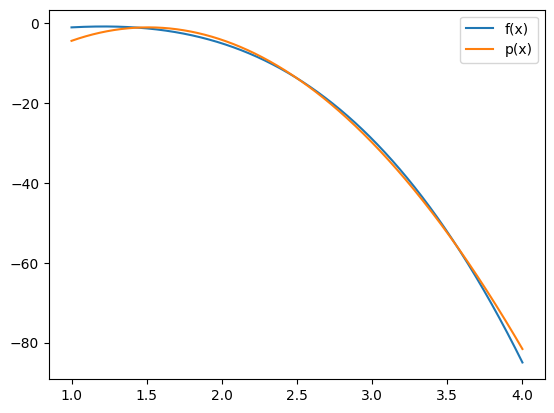

In [12]:
x = np.linspace(1, 4, 10000)
y1 = -2 * x**3 + 2 * x**2 + 4 * x - 5

y2 = -13 * x**2 + 39.25 * x - 30.625

fig, ax = plt.subplots()
ax.plot(x, y1, label='f(x)')
ax.plot(x, y2, label='p(x)')

mx = max(abs(y2 - y1))
print(mx)

plt.legend()
plt.show()

#### 7. Построить многочлен степени $\leq3$, аппроксимирующий функцию $f(x) = \sqrt{4x+7}$ на отрезке $[0, 5]$ по норме $|h|_T = \sqrt{\int_0^5 \frac{h(x)^2}{\sqrt{1-\frac{(2x-5)^2}{25}}}dx}$


Заметим, что $|h|_T = \sqrt{\int_0^5 \frac{h(x)^2}{\sqrt{1-\frac{(2x-5)^2}{25}}}dx} = 
\begin{bmatrix}
y=\frac{2x-5}{5}\\
x=\frac{5y+5}{2}\\
dx=\frac{5}{2}dy
\end{bmatrix} = \sqrt{\int_{-1}^1 \frac{5}{2} \frac{h(\frac{5y+5}{2})^2}{\sqrt{1-y^2}}dy}$. Такую норму порождает скалярное произведение непрерывных функций на отрезке $[-1,1]$: $\langle f,g \rangle = \int_{-1}^1 \frac{f(x)g(x)}{\sqrt{1-x^2}}dx$. Пусть наша функция $f$ будет определена на $[-1,1]$: $f(y)=f(\frac{5y+5}{2}) \implies f(y)=\sqrt{10y+17}$

Посмотрим на многочлены Чебышева $T_i$. Заметим, что при таком скалярном произведении $\langle T_n, T_m \rangle = 
\begin{cases}
0,\ n \neq m\\
\frac{\pi}{2},\ n=m\neq 0\\
\pi,\ n=m=0
\end{cases}$

$\langle T_n,T_m \rangle = \int_{-1}^1 \frac{\cos(n \arccos{x}) \cos(m \arccos{x})}{\sqrt{1-x^2}}dx = 
\begin{bmatrix}
\phi=\arccos{x}\\
d\phi=-\frac{1}{\sqrt{1-x^2}}dx\\
\end{bmatrix} = \int_0^{\pi} \cos(n \phi) \cos(m \phi) d\phi = \frac{1}{2} \int_0^{\pi} (\cos((n-m)\phi)+cos((n+m)\phi))d\phi = \frac{1}{2} \int_0^{\pi} \cos((n-m)\phi) d\phi + \frac{1}{2} \int_0^{\pi} \cos((n+m)\phi) d\phi = 
\begin{cases}
\frac{1}{2(n-m)} \sin((n-m)\phi) |_0^{\pi} + \frac{1}{2(n+m)} \sin((n+m)\phi) |_0^{\pi} = 0,\ n \neq m\\
\frac{\pi}{2} + \frac{1}{2} \int_0^{\pi} \cos(2n\phi) d\phi,\ n=m = \begin{cases}\pi,\ n=m=0\\ \frac{\pi}{2},\ n=m \neq 0\end{cases}
\end{cases}$


Посмотрим на многочлен $g = \frac{\langle T_0,f \rangle}{\langle T_0,T_0 \rangle} T_0 + ... + \frac{\langle T_n,f \rangle}{\langle T_n,T_n \rangle} T_n$.
Посмотрим, как он аппроксимирует $f$: $\sqrt{\langle g-f,g-f \rangle} = \sqrt{\frac{\langle T_0,f \rangle^2}{\langle T_0,T_0 \rangle} + 0 + ... + 0 - \frac{\langle T_0,f \rangle^2}{\langle T_0,T_0 \rangle} + ... + \frac{\langle T_n,f \rangle^2}{\langle T_n,T_n \rangle} + 0 + ... + 0 - \frac{\langle T_n,f \rangle^2}{\langle T_n,T_n \rangle} + \langle f,f \rangle - \frac{\langle T_0,f \rangle^2}{\langle T_0,T_0 \rangle} - ... - \frac{\langle T_n,f \rangle^2}{\langle T_n,T_n \rangle}} = \sqrt{\langle f,f \rangle - \frac{\langle T_0,f \rangle^2}{\langle T_0,T_0 \rangle} - ... - \frac{\langle T_n,f \rangle^2}{\langle T_n,T_n \rangle}}$. Заметим, что чем выше степень, тем лучше он аппроксимирует функцию.

Построим его.
$\langle f,f \rangle = \int_{-1}^1 \frac{f(x)^2}{\sqrt{1-x^2}}dx = 
\begin{bmatrix}
\phi=\arccos{x}\\
d\phi=-\frac{1}{\sqrt{1-x^2}}dx\\
x=\cos{\phi}
\end{bmatrix} = \int_0^{\pi} f(\cos{\phi})^2 d\phi = \int_0^{\pi} (10\cos{\phi}+17) d\phi = 10\sin{\phi}+17\phi|_0^{\pi} = 17\pi$.
Скалярные произведения $t_i = \langle T_i,f \rangle$ посчитать оказалось проблематично, и я посчитал в numpy:
$t_0 = \langle T_0,f \rangle \approx 12.64597452529191, 
t_1 = \langle T_1,f \rangle \approx 1.9762341227372522, 
t_2 = \langle T_2,f \rangle \approx -0.15848350186428029, 
t_3 = \langle T_3,f \rangle \approx 0.025591643230993943$

$g(x) = \frac{t_0}{\pi}1 + \frac{2t_1}{\pi}x + \frac{2t_2}{\pi}(2x^2-1) + \frac{2t_3}{\pi}(4x^3-3x)$

Поменяем на $x \in [0,5]$:
$g(x) = \frac{t_0-2t_1+2t_2-2t_3}{\pi} + \frac{4t_1-16t_2+4t_3}{5\pi}x + \frac{16t_2-32t_3}{25\pi}x^2 + \frac{64t_3}{125\pi}x^3 \approx 2,65+0,67x-0,04x^2+0,005x^3$

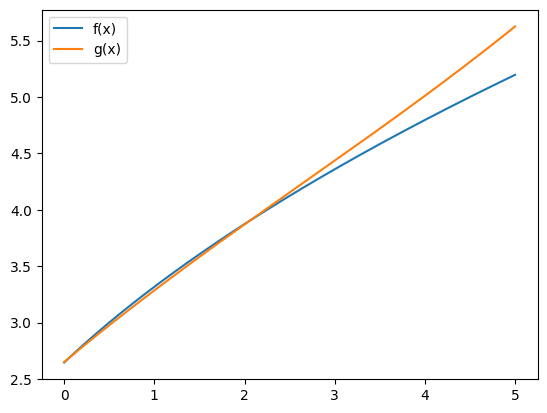

In [14]:
x = np.linspace(0, 5, 1000)
f = (4 * x + 7)**0.5
g = 2.65 + 0.67 * x - 0.04 * x**2 + 0.005 * x**3

fig, ax = plt.subplots()
ax.plot(x, f, label='f(x)')
ax.plot(x, g, label='g(x)')

plt.legend()
plt.show()

#### 8. При каком значении $q$ уравнение $2x^2+y^2(4q+1)+yz(-2q-2)+z^2(4q-1)=1$ задает единичную окружность относительно какой-то нормы в трехмерном пространстве? Найти норму вектора $(1, 1, 1)$ в зависимости от $q$


Попробуем сменить базис

$2x^2+(4q+1)y^2+(-2q-2)yz+(4q-1)z^2=1 = 2x^2+(4q+1)(y^2+2\frac{-q-1}{4q+1}yz+(\frac{-q-1}{4q+1})^2z^2)-\frac{(-q-1)^2}{4q+1}z^2+(4q-1)z^2 = 
\begin{bmatrix}
x'=\sqrt{2}x\\
y'=\sqrt{4q+1}(y-\frac{q+1}{4q+1}z)\\
z'=\sqrt{\frac{15q^2-2q-2}{4q+1}}z
\end{bmatrix} = x'^2+y'^2+z'^2 = 1$

$q$ должен удовлетворять
$\begin{cases}
4q+1>0\\
\frac{15q^2-2q-2}{4q+1}>0
\end{cases}$. Решим систему неравенств: $q>\frac{1+\sqrt{31}}{15}$

Сама норма: $\nu(x,y,z) = \sqrt{x'^2+y'^2+z'^2} = \sqrt{2x^2+y^2(4q+1)+yz(-2q-2)+z^2(4q-1)},\ q>\frac{1+\sqrt{31}}{15}$

$\nu(1,1,1)=\sqrt{2+4q+1-2q-2+4q-1}=\sqrt{6q},\ q>\frac{1+\sqrt{31}}{15}$